### Loading and combining the data
Import all the packages we will be using.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

Load all of the data we need.

In [2]:
jan_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202101-divvy-tripdata.csv")
feb_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202102-divvy-tripdata.csv")
mar_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202103-divvy-tripdata.csv")
apr_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202104-divvy-tripdata.csv")
may_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202105-divvy-tripdata.csv")
jun_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202106-divvy-tripdata.csv")
jul_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202107-divvy-tripdata.csv")
aug_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202108-divvy-tripdata.csv")
sep_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202109-divvy-tripdata.csv")
oct_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202110-divvy-tripdata.csv")
nov_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202111-divvy-tripdata.csv")
dec_2019 = pd.read_csv(r"C:\Users\besso\OneDrive\Documents\Data Science Practice\202112-divvy-tripdata.csv")

Observe the general info of each file to get a feel for the number of rows in each. Also check the column names within each file before we go about joining them all into one.

In [3]:
jan_2019.info()
feb_2019.info()
mar_2019.info()
apr_2019.info()
may_2019.info()
jun_2019.info()
jul_2019.info()
aug_2019.info()
sep_2019.info()
oct_2019.info()
nov_2019.info()
dec_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96834 entries, 0 to 96833
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             96834 non-null  object 
 1   rideable_type       96834 non-null  object 
 2   started_at          96834 non-null  object 
 3   ended_at            96834 non-null  object 
 4   start_station_name  88209 non-null  object 
 5   start_station_id    88209 non-null  object 
 6   end_station_name    86557 non-null  object 
 7   end_station_id      86557 non-null  object 
 8   start_lat           96834 non-null  float64
 9   start_lng           96834 non-null  float64
 10  end_lat             96731 non-null  float64
 11  end_lng             96731 non-null  float64
 12  member_casual       96834 non-null  object 
dtypes: float64(4), object(9)
memory usage: 9.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49622 entries, 0 to 49621
Data columns (total 13 colum

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359978 entries, 0 to 359977
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             359978 non-null  object 
 1   rideable_type       359978 non-null  object 
 2   started_at          359978 non-null  object 
 3   ended_at            359978 non-null  object 
 4   start_station_name  284688 non-null  object 
 5   start_station_id    284688 non-null  object 
 6   end_station_name    280791 non-null  object 
 7   end_station_id      280791 non-null  object 
 8   start_lat           359978 non-null  float64
 9   start_lng           359978 non-null  float64
 10  end_lat             359787 non-null  float64
 11  end_lng             359787 non-null  float64
 12  member_casual       359978 non-null  object 
dtypes: float64(4), object(9)
memory usage: 35.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247540 entries, 0 to 247539
Data col

No potential issues found, combine all 12 files into 1 dataset.

In [4]:
data = pd.concat([jan_2019,feb_2019,mar_2019,apr_2019,may_2019,jun_2019,jul_2019,
           aug_2019,sep_2019,oct_2019,nov_2019,dec_2019], axis = 0)

### Dropping columns
Drop the columns with information we will not be using. Namely, those with geographical information.

In [5]:
data = data.drop(columns = ['start_station_name','start_station_id',
                            'end_station_name','end_station_id',
                            'start_lat','start_lng','end_lat','end_lng'])  

### Duplicates and blank entries
Check for duplicate rows.

In [6]:
# define the duplicates
duplicates = data.duplicated()
# print them
data[duplicates]

,ride_id,rideable_type,started_at,ended_at,member_casual


None were found.

Check how many blank entries there are in the dataframe.

In [7]:
data.isna().sum()

ride_id          0
rideable_type    0
started_at       0
ended_at         0
member_casual    0
dtype: int64

There are none again.

### Categorical entries
Check for unusual entries in the categorical columns 'rideable_type' and 'member_casual'.

In [8]:
data.value_counts('rideable_type')

rideable_type
classic_bike     3251028
electric_bike    2031692
docked_bike       312343
dtype: int64

On closer thought about the bike types, I believe that 'classic' and 'docked' bikes are exactly the same. A Cyclistic 'classic' bike will be docked anyway. Since we are not able to clarify this, I decide that the two should be treated as exactly the same.

In [9]:
data.loc[data['rideable_type'] == 'docked_bike', ['rideable_type']] = 'classic_bike'

In [10]:
data.value_counts('member_casual')

member_casual
member    3066058
casual    2529005
dtype: int64

No unusual entries for 'member_casual' were found.

### The trip_duration_seconds column
Convert the 'started_at' and 'ended_at' columns from object to datetime.

In [28]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

Add a new column giving the trip duration for each trip, in seconds.

In [29]:
data['trip_duration_seconds'] = (data['ended_at'] - data['started_at']).dt.total_seconds()

Check this new column for zero or negative values.

In [30]:
print(data[data['trip_duration_seconds'] <= 0])

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, member_casual, trip_duration_seconds, month, day_of_week, hour_of_day, trip_duration_minutes]
Index: []


There are a number of such trips. Inspect a few of these entries closer, to see why this may have happened.

In [31]:
print(data.iloc[6592])
print(data.iloc[35676])

ride_id                     1A93913057400661
rideable_type                  electric_bike
started_at               2021-01-29 17:22:19
ended_at                 2021-01-29 17:41:23
member_casual                         member
trip_duration_seconds                 1144.0
month                                    Jan
day_of_week                              Fri
hour_of_day                            05 PM
trip_duration_minutes                    0.0
Name: 6598, dtype: object
ride_id                     AE6CE583930B82D8
rideable_type                   classic_bike
started_at               2021-01-21 20:07:06
ended_at                 2021-01-21 20:18:44
member_casual                         casual
trip_duration_seconds                  698.0
month                                    Jan
day_of_week                              Thu
hour_of_day                            08 PM
trip_duration_minutes                    0.0
Name: 35716, dtype: object


Without further information, we cannot tell why these have occured. There are only 653 of these entries, out of a total 5595063. Since these entries make up a small proportion of the overall data, it is sensible to drop them.

In [32]:
# retrieve the indices of those entries we want to drop
trip_duration_drop_index = data[data['trip_duration_seconds'] <= 0].index
# drop them
data.drop(trip_duration_drop_index, inplace = True)

We must also check for extremely long trip durations. A quick box plot will show us the distribution of all of the trip durations. We use a log scale to be able to display both the longest and shortest trips on a single graph. We also separate into 'member' and 'casual' to see whether the majority of outliers belongs to one of these in particular.

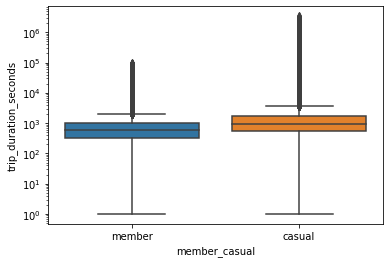

In [33]:
graph = sns.boxplot(x = 'member_casual', y = 'trip_duration_seconds', data = data)
graph.set_yscale('log')
plt.show()

We can see by the dense overlapping of outlier diamonds that there are lots of outliers. We should go further to see exactly how many outliers there are, before deciding what to do with them.

In [34]:
# check for the statistical outliers, using the interquartile range
quartile_75 = data['trip_duration_seconds'].quantile(.75)
quartile_25 = data['trip_duration_seconds'].quantile(.25)
iqr = quartile_75 - quartile_25
upper_threshold = quartile_75 + 1.5*iqr
# observe how many outliers there are
print(data[data['trip_duration_seconds'] > upper_threshold])

                 ride_id  rideable_type          started_at  \
5       5D8969F88C773979  electric_bike 2021-01-09 14:24:07   
132     0EDD906628861314   classic_bike 2021-01-22 20:54:49   
149     33A754F67BD337A7   classic_bike 2021-01-13 14:29:33   
175     2CE7583737A818C4   classic_bike 2021-01-04 14:03:49   
342     795E03AF09CE93F8   classic_bike 2021-01-21 11:13:36   
...                  ...            ...                 ...   
247438  568020D3A0F08B7F  electric_bike 2021-12-10 23:47:18   
247467  72DB1CFA499307C5  electric_bike 2021-12-04 08:20:04   
247484  03F076EF05431C27   classic_bike 2021-12-06 08:52:32   
247495  CF3BE5E8BA226DD5  electric_bike 2021-12-27 13:38:18   
247534  92BBAB97D1683D69  electric_bike 2021-12-24 15:42:09   

                  ended_at member_casual  trip_duration_seconds month  \
5      2021-01-09 15:17:54        casual                 3227.0   Jan   
132    2021-01-22 21:41:26        member                 2797.0   Jan   
149    2021-01-13 15:17:

This is about 7.3% of the total data we have, so we cannot simply drop the outliers. It could be argued that we drop just the most extreme outliers, but there is too much choice in how we decide which outliers are 'extreme'. Also notice that the longest trip durations for the casual riders are longer, so removing them would effect analyses when comparing casuals vs members. I have decided that we should keep all the outliers in, and when we analyse trip durations later on, **we will do so by observing the median, and avoid using the mean or the maximum**. This is because the median is less affected by outliers compared to the mean or the maximum.

### Adding more columns
We move onto adding some new columns which will be useful to our analysis. Namely, columns giving the months, weekdays and hour of the day each ride started in.

In [36]:
data['month'] = data['started_at'].dt.strftime('%b')
data['day_of_week'] = data['started_at'].dt.strftime('%a')
data['hour_of_day'] = data['started_at'].dt.strftime('%I %p')

In [38]:
data.head()

,ride_id,rideable_type,started_at,ended_at,member_casual,trip_duration_seconds,month,day_of_week,hour_of_day,trip_duration_minutes
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,member,625.0,Jan,Sat,04 PM,0.0
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,member,244.0,Jan,Wed,06 PM,0.0
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,member,80.0,Jan,Thu,10 PM,0.0
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,member,702.0,Jan,Thu,01 PM,0.0
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,casual,43.0,Jan,Sat,02 AM,0.0


### Converting from seconds to minutes
Before we go about visualising our data and drawing conclusions, we will convert the trip_duration_seconds column to minutes instead. This is simply so that our graphs are slightly more intuitive to read later.

In [43]:
# create a new column in minutes (rounding down)
data['trip_duration_minutes'] = data['trip_duration_seconds'] / 60

### Saving the clean data
Save our data to a .csv file, which we will then upload to Tableau.

In [44]:
data.to_csv('cyclistic_clean.csv', index = False, encoding = 'utf-8')